In [1]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
all_article = keyword_all[keyword_all['week'] <= 807]
all_article

,date,co,headline,week,pos
0,2006.01.01. 오후 11:23,매일경제,취득세ㆍ등록세 0.5%P씩 인하,0,"[취득세, 인하]"
1,2006.01.01. 오후 11:23,매일경제,양도세 부담 덜자 하반기 매물 늘듯,0,"[양도세, 부담, 하반기, 매물]"
2,2006.01.01. 오후 11:23,매일경제,서울 대치동 57평형 보유세 651만원,0,"[서울, 대치동, 평, 보유, 세, 만, 원]"
3,2006.01.01. 오후 11:23,매일경제,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,0,"[양도세, 방법, 필요, 경비, 증빙, 서류]"
4,2006.01.01. 오후 11:23,매일경제,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,0,"[올해, 실, 거래, 신고, 폭풍, 이중, 계약서, 관행]"
...,...,...,...,...,...
1065646,2021.06.26. 오전 5:00,뉴시스,비상 걸린 전세⑥전문가들 꼬일 대로 꼬였다…규제라도 풀어야,807,"[비상, 전세, 전문가, 대로, 규제]"
1065647,2021.06.26. 오전 3:04,세계일보,‘래미안 원베일리’ 청약에 만점 통장 등장… 올해 두 번째,807,"[래미안, 원, 베일리, 청약, 만점, 통장, 등장, 올해, 번]"
1065648,2021.06.26. 오전 3:01,동아일보,‘10억 로또 청약’ 원베일리… 7인 가족 만점통장 나왔다,807,"[억, 로또, 청약, 원, 베일리, 인, 가족, 만점, 통장]"
1065649,2021.06.26. 오전 3:01,동아일보,故 이건희 회장 이태원 주택 210억에 매물로,807,"[이건희, 회장, 이태원, 주택, 억, 매물]"


In [2]:
tokenized_data = []
for keyword in all_article['pos']:
    tokenized_data.append(keyword)

In [3]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 500, workers = 4, sg = 1)

In [4]:
model.wv.vectors.shape

(2173, 100)

In [5]:
similar_up_origin = [i[0] for i in model.wv.most_similar("상승")]
similar_up_origin.append('상승')
similar_up_origin

['상승세', '하락', '급등', '오름세', '하락세', '폭', '보합', '약세', '강세', '값', '상승']

In [6]:
similar_up_expend = [(suo,model.wv.similarity('상승',suo)) for suo in similar_up_origin]
for suo in similar_up_origin:
    similar_suo = [i[0] for i in model.wv.most_similar(suo)]
    for ssuo in similar_suo:
        similar_up_expend.append((ssuo,model.wv.similarity('상승',ssuo)))

In [7]:
similar_up_expend = list(set(similar_up_expend))
similar_up_df = pd.DataFrame(similar_up_expend)
similar_up_df = similar_up_df.sort_values(by = 1, ascending = False,ignore_index = True)
similar_up_df.columns = ['keyword','similarity_with_상승']
similar_up_df

,keyword,similarity_with_상승
0,상승,1.000000
1,상승세,0.813104
2,하락,0.809007
3,급등,0.794891
4,오름세,0.788420
5,하락세,0.746255
6,폭,0.726438
7,보합,0.699904
8,약세,0.697647
9,강세,0.686414


In [8]:
similar_down_origin = [i[0] for i in model.wv.most_similar("하락")]
similar_down_origin.append('하락')
similar_down_origin

['하락세', '약세', '상승', '보합', '상승세', '급락', '오름세', '둔화', '급등', '관망세', '하락']

In [9]:
similar_down_expend = [(suo,model.wv.similarity('하락',suo)) for suo in similar_down_origin]
for suo in similar_down_origin:
    similar_suo = [i[0] for i in model.wv.most_similar(suo)]
    for ssuo in similar_suo:
        similar_down_expend.append((ssuo,model.wv.similarity('하락',ssuo)))

In [10]:
similar_down_expend = list(set(similar_down_expend))
similar_down_df = pd.DataFrame(similar_down_expend)
similar_down_df = similar_down_df.sort_values(by = 1, ascending = False,ignore_index = True)
similar_down_df.columns = ['keyword','similarity_with_하락']
similar_down_df

,keyword,similarity_with_하락
0,하락,1.000000
1,하락세,0.897915
2,약세,0.824685
3,상승,0.809007
4,보합,0.805136
5,상승세,0.781323
6,급락,0.773820
7,오름세,0.769484
8,둔화,0.747014
9,급등,0.692772


1. 중복된 키워드 지우기

In [11]:
up_word = []
_list = [i for i in similar_down_df['keyword']]
for i in similar_up_df['keyword']:
    if i not in _list:
        up_word.append(i)
    if len(up_word) == 5:
        break
up_word

['가격', '전셋값']

In [12]:
down_word = []
_list = [i for i in similar_up_df['keyword']]
for i in similar_down_df['keyword']:
    if i not in _list:
        down_word.append(i)
    if len(down_word) == 5:
        break
down_word

['뚝', '회복', '매수세', '약발', '급매물']

2. 중복된 키워드가 up에 가까운지 down에 가까운지 확인하고 가까운 쪽으로

In [13]:
up_word = []
_list = [i for i in similar_down_df['keyword']]
for i in similar_up_df['keyword']:
    if i not in _list:
        up_word.append(i)
    else:
        if float(similar_up_df[similar_up_df['keyword'] == i]['similarity_with_상승']) >= float(similar_down_df[similar_down_df['keyword'] == i]['similarity_with_하락']):
            up_word.append(i)
    if len(up_word) == 5:
        break
up_word

['상승', '상승세', '급등', '오름세', '폭']

In [14]:
down_word = []
_list = [i for i in similar_up_df['keyword']]
for i in similar_down_df['keyword']:
    if i not in _list:
        down_word.append(i)
    else:
        if float(similar_down_df[similar_down_df['keyword'] == i]['similarity_with_하락']) >= float(similar_up_df[similar_up_df['keyword'] == i]['similarity_with_상승']):
            down_word.append(i)
    if len(down_word) == 5:
        break
down_word

['하락', '하락세', '약세', '보합', '급락']

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


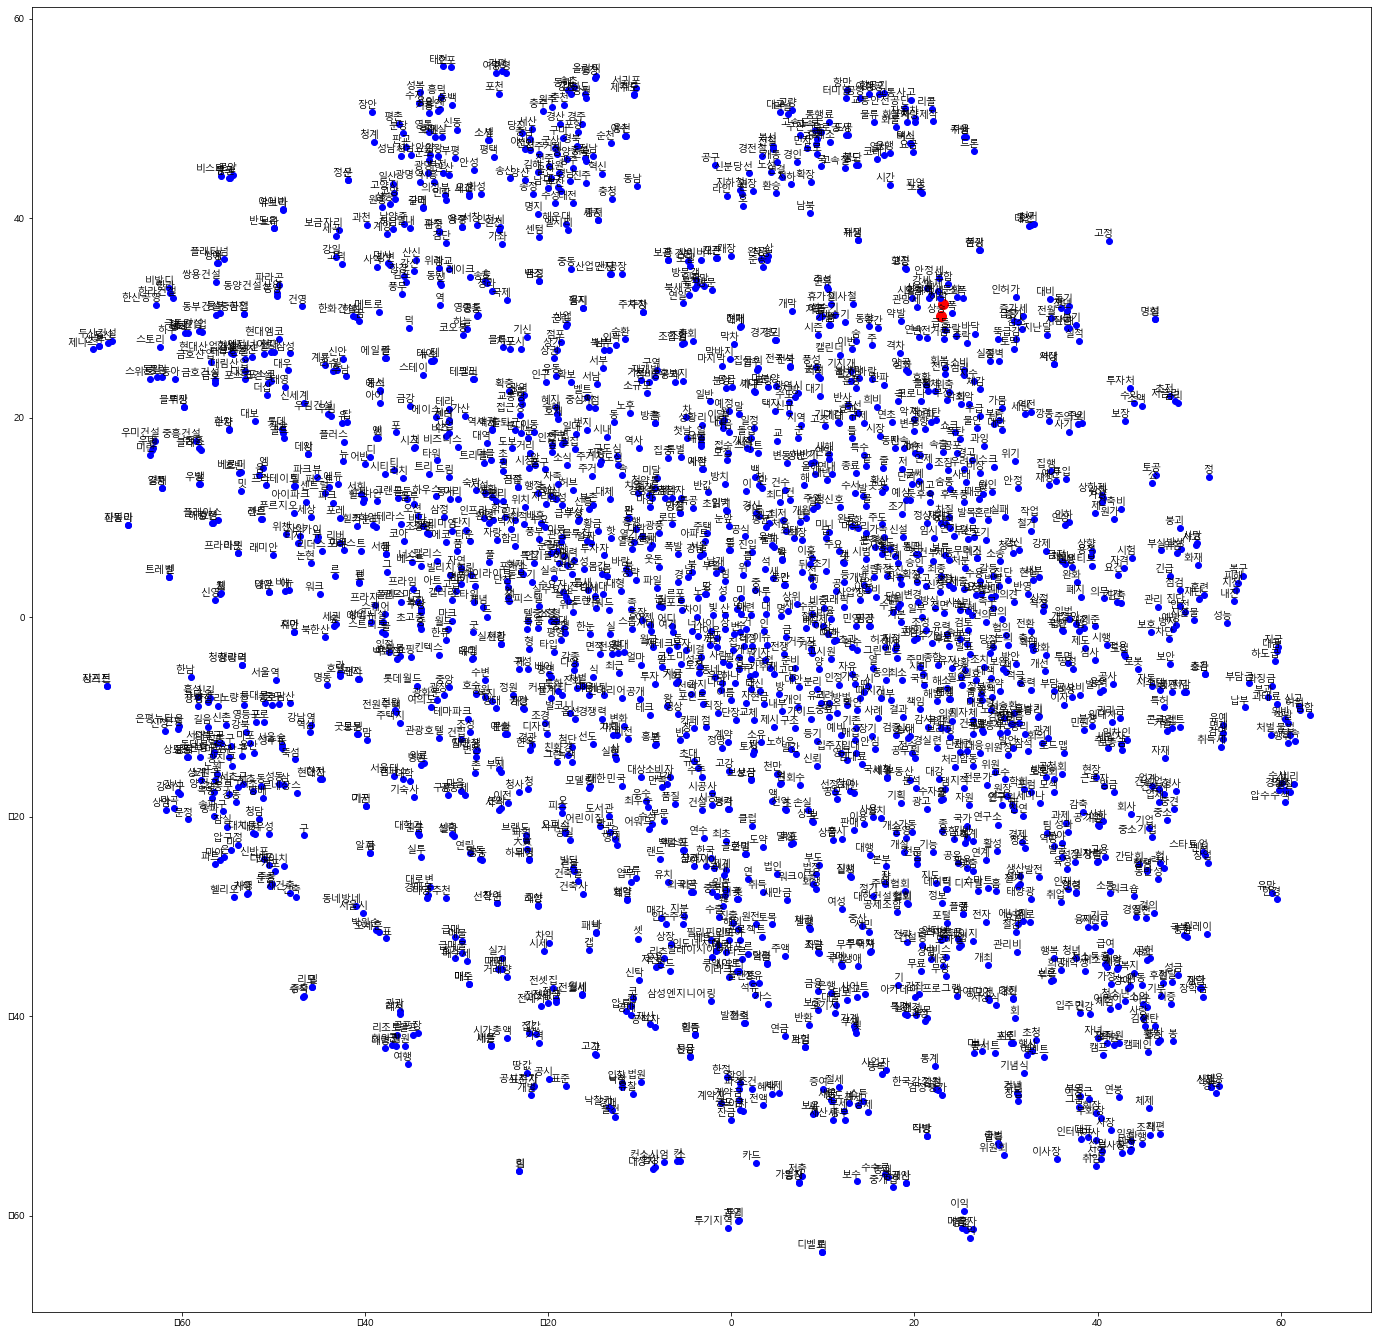

In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


"Creates and TSNE model and plots it"
labels = []
tokens = []
words = list(model.wv.index_to_key)
for word in words:
    tokens.append(model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(24, 24)) 
for i in range(len(x)):
    if (labels[i] == '상승') or (labels[i] == '하락'):
        plt.scatter(x[i],y[i], s = 100, color = 'r')
    else:
        plt.scatter(x[i],y[i], color = 'b')
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', )
plt.savefig('../article/keyword_vector.png', dpi=300)
plt.show()

In [16]:
uw_index = []
dw_index = []

for uw in up_word:
    uw_index.append(words.index(uw))
    
for dw in down_word:
    dw_index.append(words.index(dw))
    
uw_vector = []
dw_vector = []

In [17]:
ui = words.index('상승')
di = words.index('하락')

print(f'상승 vector: ({x[ui]}, {y[ui]})')
print(f'하락 vector: ({x[di]}, {y[di]})')

상승 vector: (22.92544174194336, 30.25435447692871)
하락 vector: (23.158843994140625, 31.459632873535156)
